In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('Datasets\deptos.csv')

C:\Users\Pc-ADS\AppData\Local\Temp\ipykernel_30156\2866178669.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Datasets\deptos.csv')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26299 entries, 0 to 26298
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                26299 non-null  int64  
 1   link              26299 non-null  object 
 2   nombre            26299 non-null  object 
 3   fecha_consultado  26299 non-null  object 
 4   fecha_publicado   20319 non-null  object 
 5   divisa            26299 non-null  object 
 6   monto             26299 non-null  int64  
 7   ppm2              26294 non-null  float64
 8   ppm2_avg          26238 non-null  float64
 9   superficie_t      26299 non-null  float64
 10  superficie_u      26066 non-null  float64
 11  terraza           16981 non-null  float64
 12  ambientes         9024 non-null   float64
 13  dormitorios       25597 non-null  float64
 14  banos             23986 non-null  float64
 15  ubicacion         26299 non-null  object 
 16  estacionamiento   14750 non-null  float6

#### Observaciones:
- ppm2 es monto/superficie_u

In [4]:
df.sample(5)

,id,link,nombre,fecha_consultado,fecha_publicado,divisa,monto,ppm2,ppm2_avg,superficie_t,superficie_u,terraza,ambientes,dormitorios,banos,ubicacion,estacionamiento,bodegas,cantidad_pisos,dep_por_piso,piso,tipo_depto,orientacion,antiguedad,gastos_comunes,latitud,longitud,pais,region,comuna,calle,direccion_num
25579,1586277943,https://portalinmobiliario.com/MLC-1586277943,Depto En Venta 2 Dorm-2 Baños Estacionamiento ...,2025-04-05,NaN,UF,3100,62.00,72.00,52.00,50.00,NaN,2.00,2.00,2.00,Depto En Venta 2 Dorm-2 Baños Estacionamiento ...,1.00,1.00,NaN,NaN,NaN,NaN,SO,0 años,NaN,-33.45,-70.64,Chile,Región Metropolitana de Santiago,Santiago,Avenida Santa Isabel,Avenida Santa Isabel
5771,1566468491,https://portalinmobiliario.com/MLC-1566468491,Departamento En Venta De 1 Dorm. En Santiago,2025-04-26,Publicado hace 3 meses por Fuenzalida Isabel L...,UF,3050,108.00,73.00,30.00,28.00,2.00,NaN,1.00,1.00,"Santa Elena / Porvenir, Barrio Diez de Julio, ...",1.00,1.00,12.00,18.00,3.00,Departamento,O,4 años,NaN,-33.45,-70.63,Chile,Región Metropolitana de Santiago,Santiago,Santa Elena,Santa Elena
16018,1582162663,https://portalinmobiliario.com/MLC-1582162663,Venta Departamento Con Bodega Independencia Metro,2025-04-29,Publicado hace 58 días,UF,1290,46.00,62.00,31.00,28.00,3.00,NaN,1.00,1.00,"Av. Independencia 1815, Independencia, Plaza C...",NaN,1.00,12.00,8.00,4.00,Departamento,SP,9 años,NaN,-33.41,-70.66,Chile,Región Metropolitana de Santiago,Independencia,Avenida Independencia,Avenida Independencia
12924,2855826368,https://portalinmobiliario.com/MLC-2855826368,Departamento En Venta De 1 Dorm. En Santiago,2025-04-26,Publicado hace 45 días,UF,1500,50.00,67.00,34.00,30.00,4.00,NaN,1.00,1.00,"Hermanos Amunategui Con Rosas, Centro Históric...",NaN,1.00,15.00,10.00,4.00,Departamento,O,12 años,NaN,-33.44,-70.66,Chile,Región Metropolitana de Santiago,Santiago,Hermanos Amunátegui,Hermanos Amunátegui
24933,2851889986,https://portalinmobiliario.com/MLC-2851889986,"Cómodo, Luminoso Amplia Terraza!",2025-04-05,NaN,UF,2450,74.00,81.00,40.00,33.00,NaN,1.00,1.00,1.00,"Vicuña Mackenna 3900 - 4200, Macul, Metro Cami...",NaN,NaN,15.00,NaN,3.00,Departamento,P,2 años,NaN,-33.49,-70.62,Chile,Región Metropolitana de Santiago,Macul,Eduardo De Calixto,Eduardo De Calixto


In [ ]:
#df.to_excel('deptos.xlsx', index=False)

### Seguir revisando en ese excel exportado los años que hay que revisar. como 1025, 181, 508, 1820, 914, 1023, 1816

In [7]:
def procesar_antiguedad(valor):
    if pd.isnull(valor):
        return np.nan
    
    # Quitar texto y símbolos innecesarios
    valor = str(valor).replace('años', '').replace('-', '').replace('.', '').strip()
    
    # Si no quedan solo dígitos, algo raro pasó
    if not valor.isdigit():
        return np.nan
    
    numero = int(valor)
    
    # Si parece un año (1800–2025)
    if 1800 <= numero <= 2025:
        return 2025 - numero
    
    # Si parece una antigüedad razonable
    if 0 <= numero <= 150:
        return numero
    
    # Todo lo demás se descarta
    return np.nan

# Aplicar al DataFrame
df['antiguedad'] = df['antiguedad'].apply(procesar_antiguedad)


In [10]:
# Ajustamos el formato de algunas columnas
columnas_a_convertir = ['ambientes', 'dormitorios', 'banos', 'estacionamiento', 'bodegas', 'cantidad_pisos', 'dep_por_piso', 'piso', 'antiguedad']  # Reemplaza con tus nombres reales
df[columnas_a_convertir] = df[columnas_a_convertir].astype('Int64')  # Usa 'Int64' para permitir valores NaN


In [11]:
df['antiguedad'].unique()
#df['antiguedad'].describe()

<IntegerArray>
[  1,   2,   6,   0,  26,  21,  30,  13,  29,  16,
 ...
 105,  89, 100,  87, 122,  82, 110,  92,  96, 209]
Length: 105, dtype: Int64

In [6]:
df['monto'].unique()

array([11200, 17490, 21000, ...,  2208,  1694,  2324], dtype=int64)

#### Borramos columnas que sabemos inutiles o redundantes.
 - ubicacion: Información escrita por los usuarios que publican en el sitio, sin validación y con distintos formatos. Cualquier informacion valioza al respecto se puede obtener mediante las coordenadas.
 - direccion_num: Mismos valores que en columna calle, error de la API o el llamado a esta. 
 - region: Todos los valores son Región Metropolitana de Santiago.
 - pais: Todos los valores son Chile.
 - fecha_consultado: No tiene mayor relevancia, todos fueron consultados en un rango 1 mes y 8 dias.
 - fecha_publicado: 6000 datos faltantes aprox. El proyecto no contempla el factor temporal por ahora.
 - gastos_comunes: solo hay 2 datos no nulos. Problema en el scraping. Intentaré obtener esos datos si es posible pero por ahora proseguiré sin ellos.
 - link: información redundante con id
 - nombre: Información escrita por los usuarios que publican en el sitio, sin validación y con distintos formatos. Incluyen comentarios apreciativos y subjetivos.
 - ppm2_avg: Precio promedio en la zona. No se conoce los criterios para este cálculo, como el metodo para determinar la zona, las similitudes necesarias para comparar con otras viviendas, etc.
 - divisa: tanto monto como ppm2 está todo expresado en UF

##### Las demás columnas requieren más análisis

In [12]:
# Borramos las columnas mencionadas
df.drop(columns=["ubicacion", "direccion_num", "region", "pais", "fecha_consultado", "fecha_publicado", "gastos_comunes", "link", "nombre", "ppm2_avg", "divisa"], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26299 entries, 0 to 26298
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               26299 non-null  int64  
 1   monto            26299 non-null  int64  
 2   ppm2             26294 non-null  float64
 3   superficie_t     26299 non-null  float64
 4   superficie_u     26066 non-null  float64
 5   terraza          16981 non-null  float64
 6   ambientes        9024 non-null   Int64  
 7   dormitorios      25597 non-null  Int64  
 8   banos            23986 non-null  Int64  
 9   estacionamiento  14750 non-null  Int64  
 10  bodegas          13590 non-null  Int64  
 11  cantidad_pisos   16239 non-null  Int64  
 12  dep_por_piso     13273 non-null  Int64  
 13  piso             16174 non-null  Int64  
 14  tipo_depto       20883 non-null  object 
 15  orientacion      17124 non-null  object 
 16  antiguedad       20586 non-null  Int64  
 17  latitud     

In [21]:
print("ambientes\n", df['ambientes'].unique())
print("estacionamiento\n", df['estacionamiento'].unique())
print("bodegas\n", df['bodegas'].unique())
print("cantidad_pisos\n", df['cantidad_pisos'].unique())
print("dep_por_piso\n", df['dep_por_piso'].unique())
print("piso\n", df['piso'].unique())
print("tipo_depto\n", df['tipo_depto'].unique())
print("orientacion\n", df['orientacion'].unique())

ambientes
 <IntegerArray>
[2, <NA>, 5, 3, 7, 4, 6, 1, 8, 10, 12, 11, 9, 37, 13, 15, 0, 19, 14]
Length: 19, dtype: Int64
estacionamiento
 <IntegerArray>
[   1,    2,    5,    3, <NA>,    4,   10,  100,   40,   30,    6,    8,    7,
   31,   22,  200,   48,   17,   50,  120,  530,   12,   11,    9,   13,  155,
   16,   15,   25,   26,   80,   29,   45,   28,   27,   14,   51,   39,  131,
  150,  327,   20,   56,   23,    0,   21, 1100,  400,  110,   62,   66,   89,
  116,  103,   -1]
Length: 55, dtype: Int64
bodegas
 <IntegerArray>
[   1, <NA>,    2,    6,    3,    5,   10,    4,  142,   30,   -1,   57,   11,
  234, 1040,   75,  319,   32,   49,    0,  112,   34,    7,   15,   12,   56,
   23,   50]
Length: 28, dtype: Int64
cantidad_pisos
 <IntegerArray>
[    8,     6,  <NA>,     2,     1,     4,    12,    16,     7,    10,    17,
     5,     3,     9,    15,    13,    22,    21,    32,    24,    19,    18,
    27,    11,    26,    20,    28,    25,    29,    23,    14,    30,    33,
   

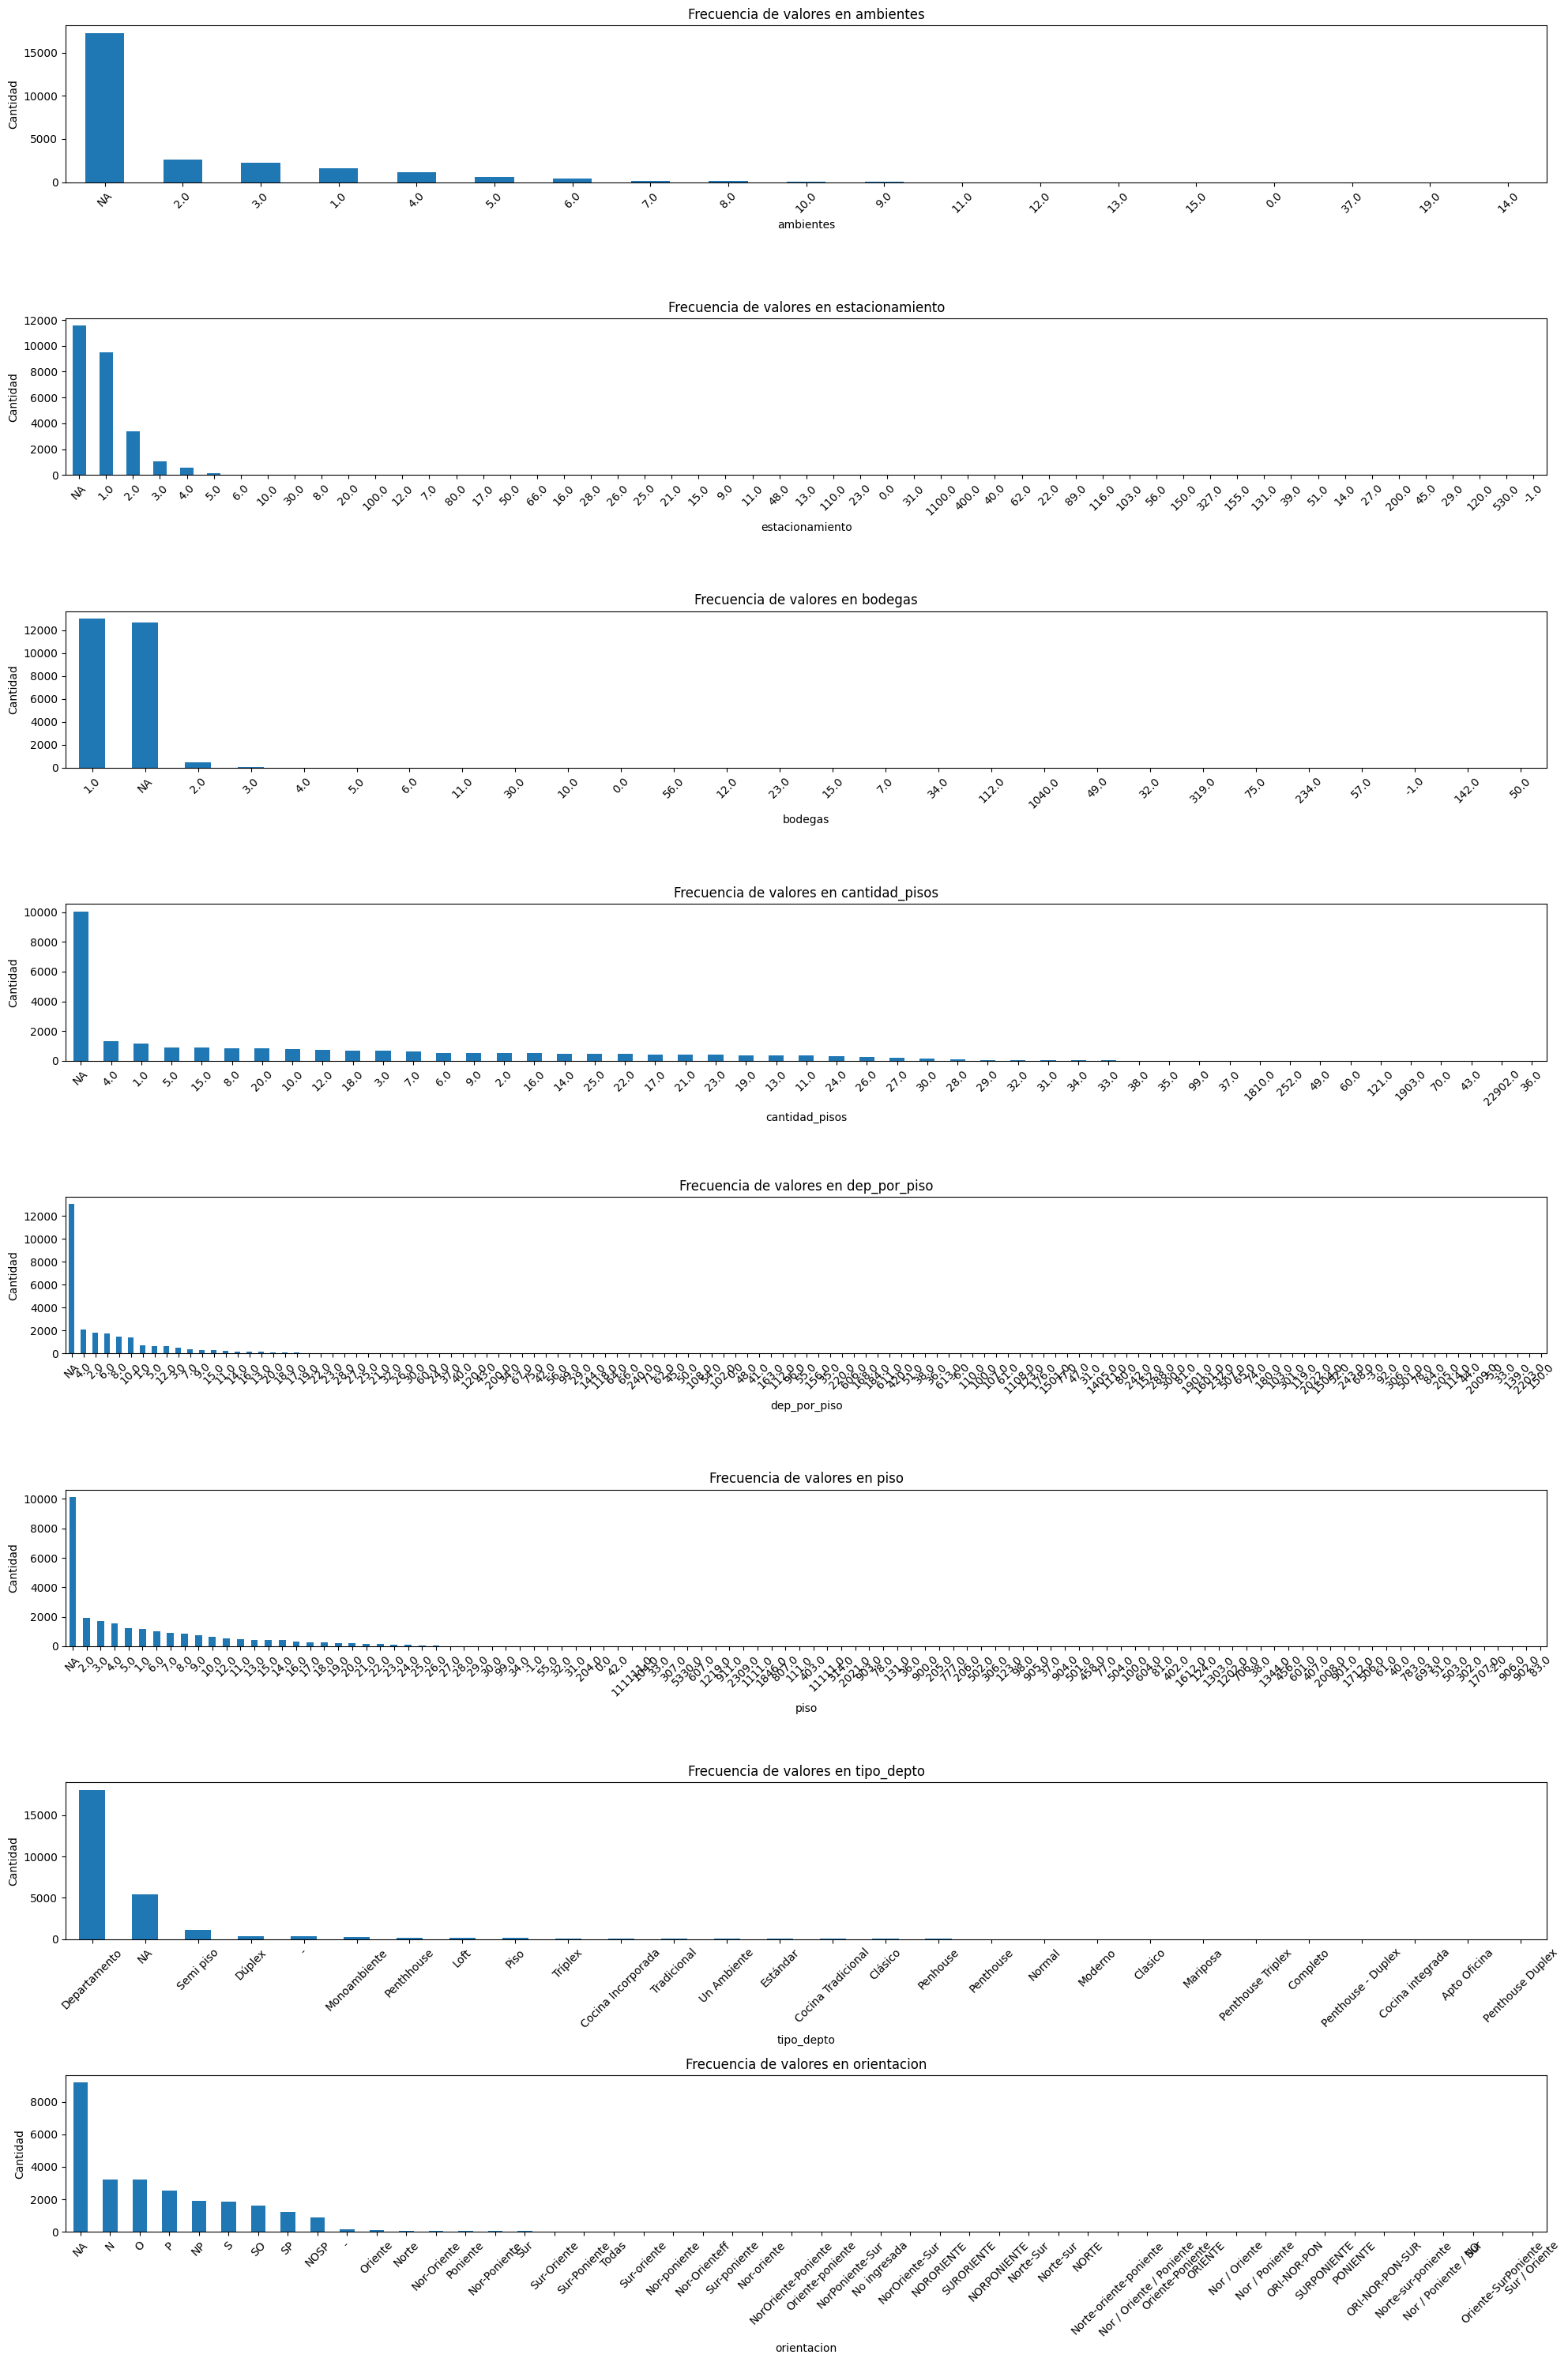

In [24]:
cols = ['ambientes', 'estacionamiento', 'bodegas', 'cantidad_pisos', 
        'dep_por_piso', 'piso', 'tipo_depto', 'orientacion']

plt.figure(figsize=(20, 30))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    
    # Convertir todos los valores a string, incluyendo pd.NA correctamente
    series_str = df[col].apply(lambda x: str(x) if pd.notna(x) else 'NA')
    value_counts = series_str.value_counts()
    
    value_counts.plot(kind='bar')
    plt.title(f'Frecuencia de valores en {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [26]:
df.to_csv('deptos_en_limpieza.csv', index=False)

In [25]:
df.describe()

,id,monto,ppm2,superficie_t,superficie_u,terraza,ambientes,dormitorios,banos,estacionamiento,bodegas,cantidad_pisos,dep_por_piso,piso,antiguedad,latitud,longitud
count,26299.00,26299.00,26294.00,26299.00,26066.00,16981.00,9024.00,25597.00,23986.00,14750.00,13590.00,16239.00,13273.00,16174.00,20586.00,26299.00,26299.00
mean,2246762710.85,7501.28,79.30,134.27,103.05,27.07,2.96,2.33,1.97,1.93,1.22,13.91,9.07,25.03,12.94,-33.44,-70.62
std,627748454.70,9055.07,427.72,1917.82,584.96,273.82,1.76,1.17,1.17,11.73,9.74,180.98,47.77,1240.34,14.09,0.04,0.05
min,1359204515.00,15.00,0.00,1.00,-0.01,0.50,0.00,1.00,1.00,-1.00,-1.00,1.00,-6.00,-2.00,0.00,-33.65,-70.83
25%,1580479350.00,2330.50,53.00,44.00,41.00,3.00,2.00,1.00,1.00,1.00,1.00,5.00,4.00,3.00,3.00,-33.46,-70.65
50%,2751955500.00,3913.00,70.00,65.00,60.00,6.00,3.00,2.00,2.00,1.00,1.00,11.00,6.00,6.00,9.00,-33.44,-70.62
75%,2850891501.00,8600.00,92.00,115.00,100.00,20.00,4.00,3.00,2.00,2.00,1.00,19.00,10.00,11.00,17.00,-33.42,-70.58
max,2864912270.00,158000.00,65000.00,292675.00,66635.00,32543.00,37.00,37.00,43.00,1100.00,1040.00,22902.00,2203.00,111111.00,209.00,-33.28,-70.49
